### Objective:

Build a classification model that predicts heart disease in a subject.

### About the data:

### Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
import matplotlib.pyplot as I'm plt
import matplotlib.ticker as mtick
from matplotlib.patches import ConnectionPatch
import warnings
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")

### Reading files and displaying data:

#### Importing Dataset

In [ ]:
#import dataset and read file
data=pd.read_csv('framingham.csv')
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0




#### About the Data:
    
- Numerical data : Age,Education,cigsPerDay,totChol,sysBP,diaBP,BMI, heart Rate,glucose

    
- Categorical data : male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes

#### Checking NULL values:

In [ ]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Observation:
    
- Glucose is having 9.1% of null values-388
- Education  is having 2.4% of null values-105
- BPMeds has 1.2% of null values - 53
- tot Chol 1.1% of null values - 50
- cigsPerDay has 0.6% of null values - 29
- BMI has 0.4% of null values - 19
- heartRate has 0.02% of null values - 1

In [ ]:
data.count()

male               4240
age                4240
education          4135
currentSmoker      4240
cigsPerDay         4211
BPMeds             4187
prevalentStroke    4240
prevalentHyp       4240
diabetes           4240
totChol            4190
sysBP              4240
diaBP              4240
BMI                4221
heartRate          4239
glucose            3852
TenYearCHD         4240
dtype: int64

### Basic  Statistics of the data:

In [ ]:
data1 = data.groupby('TenYearCHD').mean()[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
data1

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,0.410734,48.762514,0.489989,8.713925,0.023354,0.003893,0.275862,0.019188,235.147398,130.337319,82.166435,25.671659,75.762514,80.679251
1,0.532609,54.145963,0.517081,10.629283,0.064771,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


### Handling of Missing Values ,Outliers and Duplicate Data:

In [ ]:
#to check for the duplicate
duplicate_data=data[data.duplicated()]
duplicate_data.shape

(0, 16)

### Observation:

 - There are no duplicates in our data
 - So We can go with checking null data

#### Get the name of missing columns and  no. of missing data in the respective columns:

In [ ]:
#get the name of missinmg columns and  no. of missing data in the respective columns
print(data.columns[data.isnull().any()])
print(data.isnull().sum())

Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


### find the rows with the missing data and remove the data

In [ ]:
#find the rows with the missing data and remove the data
null=data[data.isnull().any(axis=1)]
print(data.isnull().sum().sum())
data.shape

645


(4240, 16)

In [ ]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Removing of columns:

In [ ]:
#here we are dropping the education column since it is not related to the objective or in predicting the outcome of  the variable
data=data.drop(['education'],axis=1)
print(data.isnull().sum().sum())
data=data.dropna()
print(data.isnull().sum().sum())
data.shape

540
0


(3751, 15)

### Observation:

Logically, Education can't be related in anyway from getting Heart Disease.

So Education can be removed from our dataset.

###  checking for null values

In [ ]:
data.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Observations:

- All the Null  values are removed.
- Now we can go with performing EDA

# Exploratory Data Analysis: 

In [ ]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
data.shape

(3751, 15)

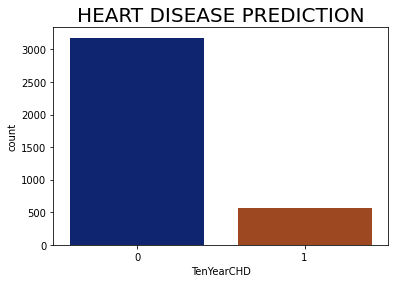

In [ ]:
#Target Variable Distribution:
plt.title("HEART DISEASE PREDICTION",fontsize=20)
plt.rcParams['figure.figsize']=(7,5)
sb.countplot(data['TenYearCHD'],palette="dark")
plt.show()

### Observation:

The People with CHD are estimated to be 25% from the above plot

## Univariate Analysis:

In [ ]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

male and Target


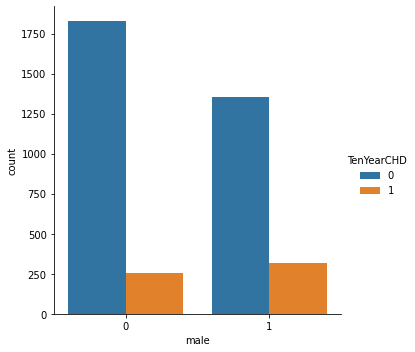

currentSmoker and Target


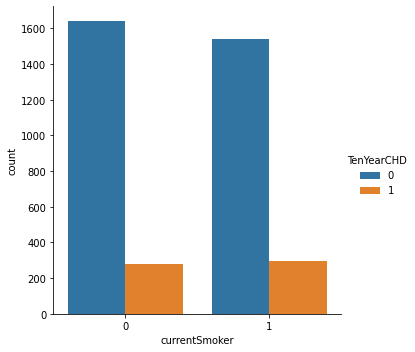

BPMeds and Target


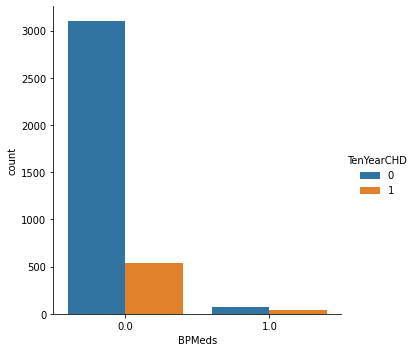

prevalentStroke and Target


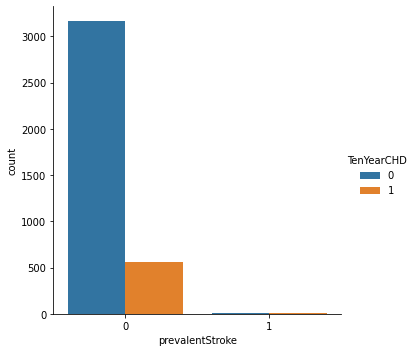

prevalentHyp and Target


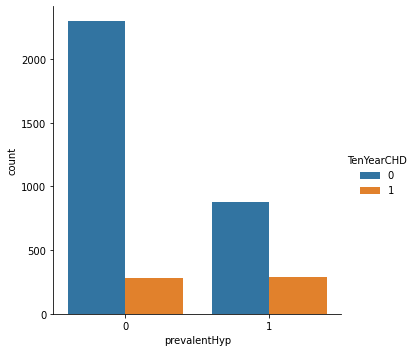

diabetes and Target


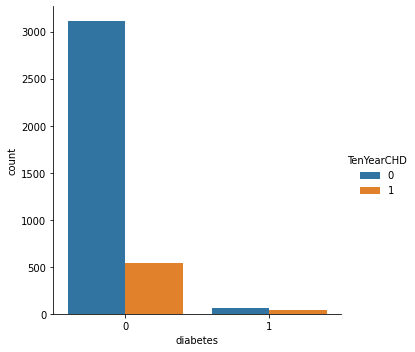

In [ ]:
categoricalcols=['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for i in categoricalcols:
    print(i, 'and Target')
    sb.catplot(x=i,hue='TenYearCHD',data=data,kind='count')
    plt.show()

### Observations:

 - From the above plot BPMeds, prevalent stroke , diabetes seems to be very unequal
 - So we can say that They play a minor role in the dataset and can be removed

### Age Vs TenYearCHD

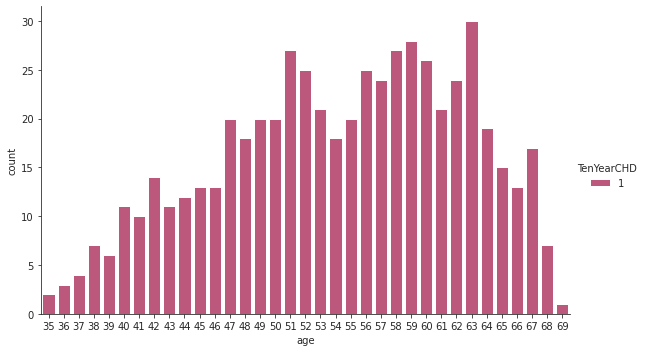

In [ ]:
%matplotlib inline
sb.set_style('ticks')
sb.catplot(x='age',kind='count',hue='TenYearCHD',palette='plasma',aspect=13/8,data=data.loc[lambda df: df.TenYearCHD==1])

### Observations:

 - From the above graph , we notice that the plot is increasing as the age is increasing.
 - So we can say that 'AGE' is one of the very important feature
 
 Now let us check for other features

### cigsPerDay vs Target

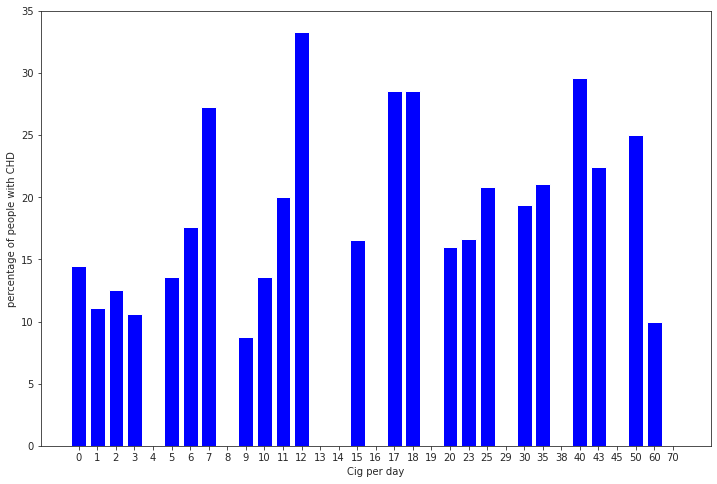

In [ ]:
#cigsPerDay vs target
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(12,8),facecolor='white')
dist=data['cigsPerDay'].value_counts()
cigs=[int(x) for x in sorted(dist.index)]
chdCount= dict(map(lambda x:[x,0],cigs))
for t,c in zip(data['TenYearCHD'],data['cigsPerDay']):
    chdCount[c]+=t
rates=[(chdCount[c]/ float(dist.loc[c]))*100 for c in cigs]

x=np.arange(len(cigs))
ax.bar(x,rates,color='blue')
ax.set_xticks(x)
ax.set_xticklabels(cigs)
ax.set_xlabel('Cig per day')
ax.set_ylabel('percentage of people with CHD')
plt.show()

In [ ]:
data['cigsPerDay']=data['cigsPerDay'].astype(int)

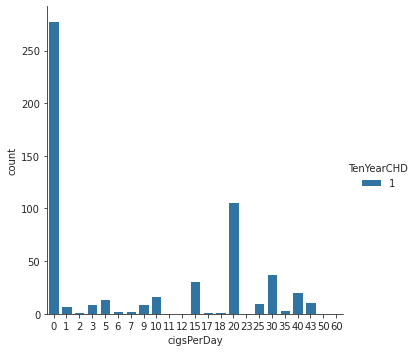

In [ ]:
sb.set_style('ticks')
sb.catplot(x='cigsPerDay',kind='count',hue='TenYearCHD',data=data[data.TenYearCHD==1])

### Observation:

 - According to our assumptions , cigsPerDay is highly related to CHD. 
 
 - But, the above plot shows that CigsPerDay is not related to CHD 
 - So Cigs per day can be ignored

## Numerical Columns Analysis:

plotting between totChol and ten year CHD


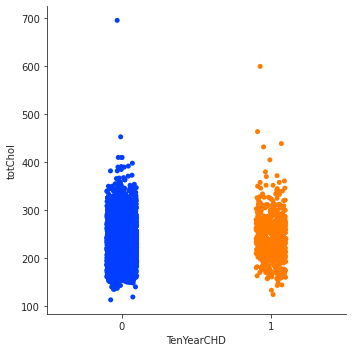

plotting between sysBP and ten year CHD


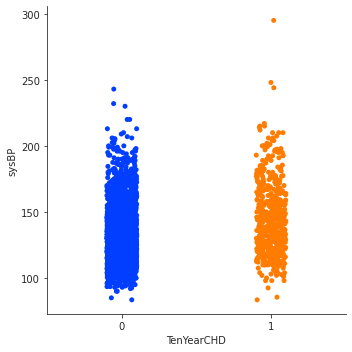

plotting between diaBP and ten year CHD


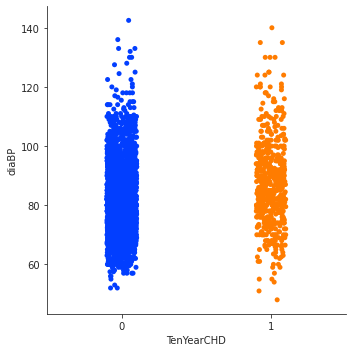

plotting between BMI and ten year CHD


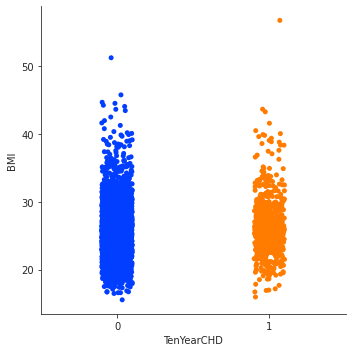

plotting between heartRate and ten year CHD


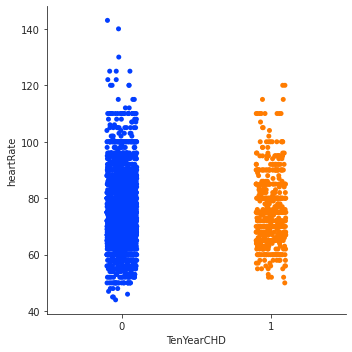

plotting between glucose and ten year CHD


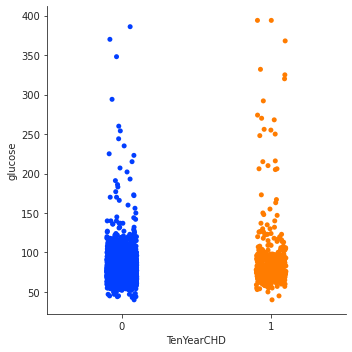

In [ ]:
cols=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in cols:
    print("plotting between",i,"and ten year CHD")
    sb.catplot(x='TenYearCHD',y=i,palette="bright",data=data)
    plt.show()

# Bivariate Analysis 

### Observations:

- From the above Bivariate analysis, We detect that All the plots are non-linear w.r.t our Target Variable.
- Feature Selection, Feature Engineering will help us to get the Linear data

## Correlation Analysis:

### Observations:

 - Glucose,SysBP,Diabetes,PrevalentHyp, DiaBP are having collinear data
 - Most of the variables are multicollinear variables

## Data Visualization:

### DENSITY:

### Data Distributions using HISTOGRAMS:

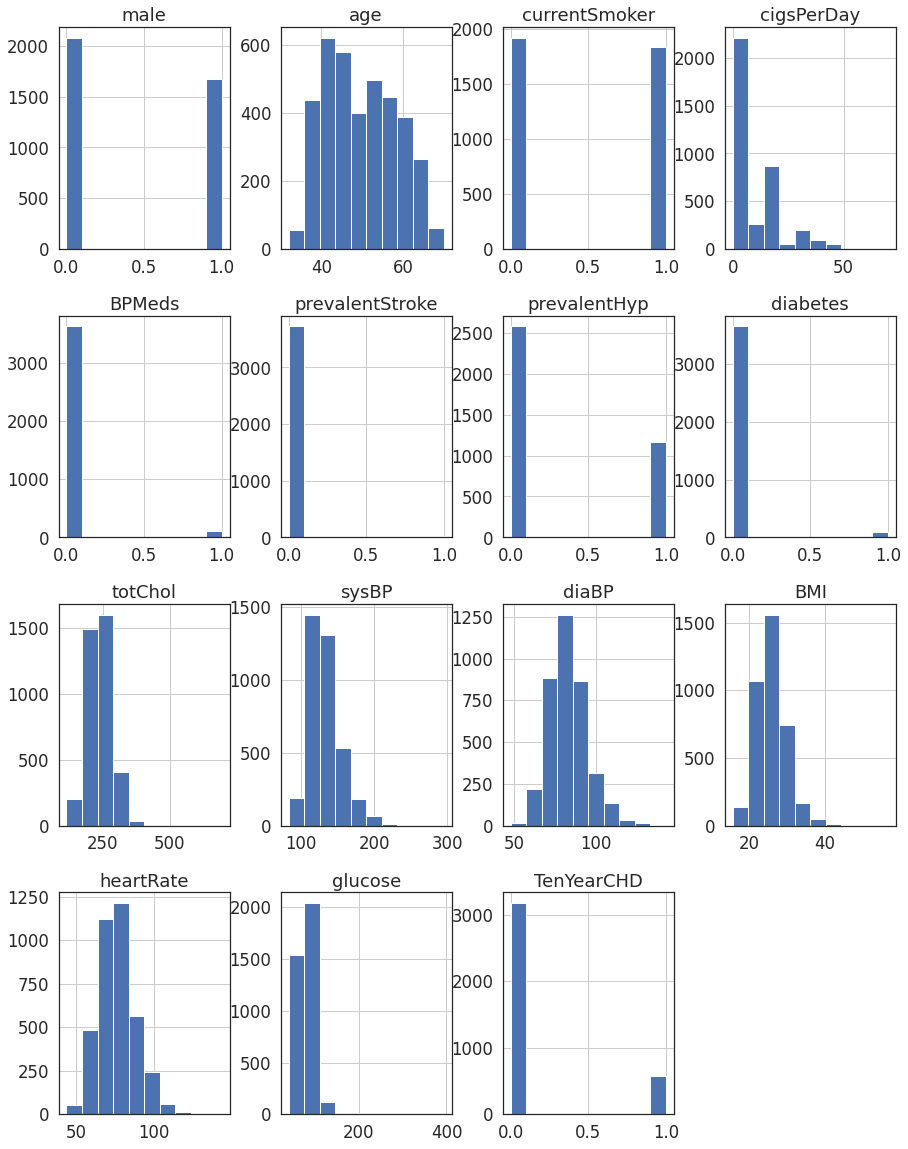

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

### Observations:

 - BPMeds,CurrentSmoker,Diabetes,Male,prevalentStroke.prevalentHyp are Skewed
 - All the remaining variables are balanced slightly

# Important feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array=data.values
X=data.iloc[:,0:14]
Y=data.iloc[:,14]
test = SelectKBest(score_func=chi2, k=10)
fit=test.fit(X,Y)

dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

impfeature_Scores=pd.concat([dfcolumns,dfscores],axis=1)
impfeature_Scores.columns=['feature','Score']

impfeature_Scores=impfeature_Scores.sort_values('Score',ascending=False)
print(impfeature_Scores)

            feature       Score
9             sysBP  667.109932
13          glucose  402.409837
1               age  297.974980
8           totChol  252.958627
3        cigsPerDay  185.115196
10            diaBP  142.920436
6      prevalentHyp   82.342164
7          diabetes   31.711253
4            BPMeds   26.116583
0              male   19.178560
11              BMI   17.108210
5   prevalentStroke    8.480982
12        heartRate    3.635480
2     currentSmoker    0.904429


### Observations:

Here we made use of SelectKBest and Chi2. It works as:'Higher the values,Higher the Dependency between the categorical  variables and are MORE USEFUL for classification.

SelectKBest gives the best two (k=2) features based on higher chi2 values. 

In [ ]:
ifeature=impfeature_Scores.iloc[0:10,:]
print(ifeature)
columnname=ifeature["feature"].tolist()
print(columnname)

         feature       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male']


### Observations:

As mentioned above The lower dependencies: prevalentStroke, heartRate, currentSmoker  are removed from data as they are having very less score

In [ ]:
columnname.append("TenYearCHD")
newdata=data[columnname]

In [ ]:
newdata.head(10)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23,84.0,0,0,0.0,0,0
5,180.0,99.0,43,228.0,0,110.0,1,0,0.0,0,0
6,138.0,85.0,63,205.0,0,71.0,0,0,0.0,0,1
7,100.0,78.0,45,313.0,20,71.0,0,0,0.0,0,0
8,141.5,79.0,52,260.0,0,89.0,1,0,0.0,1,0
9,162.0,88.0,43,225.0,30,107.0,1,0,0.0,1,0


### Observations:

For the above selected columns we had just added our target column which is 'TenYearCHD'	



In [ ]:
newdata.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,132.368435,81.880032,49.573447,236.928019,9.008531,82.938550,0.311917,0.027193,0.030392,0.445215,0.152493
std,22.046522,23.882233,8.570204,44.611594,11.925097,11.932779,0.463338,0.162666,0.171686,0.497056,0.359546
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,71.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,87.000000,56.000000,264.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,696.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Q1=newdata.quantile(0.25)
Q3=newdata.quantile(0.75)
IQR=Q3-Q1
print(IQR)


sysBP           27.0
glucose         16.0
age             14.0
totChol         58.0
cigsPerDay      20.0
diaBP           15.0
prevalentHyp     1.0
diabetes         0.0
BPMeds           0.0
male             1.0
TenYearCHD       0.0
dtype: float64


### Observations:

Here we used IQR.
The interquartile range is used to find outliers in data. Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR

In [ ]:
cutoff=IQR*1.5
lower_limit,upper_limit=Q1-cutoff,Q3+cutoff
xyz=(newdata<lower_limit)|(newdata>upper_limit)
print(xyz)

      sysBP  glucose    age  totChol  cigsPerDay  diaBP  prevalentHyp  \
0     False    False  False    False       False  False         False   
1     False    False  False    False       False  False         False   
2     False    False  False    False       False  False         False   
3     False    False  False    False       False  False         False   
4     False    False  False    False       False  False         False   
...     ...      ...    ...      ...         ...    ...           ...   
4233  False    False  False    False       False  False         False   
4234  False    False  False    False       False  False         False   
4237  False    False  False    False       False  False         False   
4238  False    False  False    False       False  False         False   
4239  False    False  False    False       False  False         False   

      diabetes  BPMeds   male  TenYearCHD  
0        False   False  False       False  
1        False   False  False      

- Thus the max outliers are removed using the IQR 

In [ ]:
idx = xyz.apply(lambda ts: any(ts == True), axis=1)
xyz[idx]

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
3,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,True
13,False,False,False,False,False,False,False,False,True,False,False
15,False,False,False,False,False,False,False,False,False,False,True
17,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4223,False,False,False,False,False,False,False,False,True,False,True
4226,False,False,False,False,False,False,False,False,False,False,True
4228,True,True,False,False,False,True,False,True,False,False,False
4232,False,False,False,False,False,False,False,False,False,False,True


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
1111,159.5,140.0,52,600.0,0,94.0,1,1,0.0,0,1
3160,157.0,84.0,51,696.0,9,87.0,1,0,0.0,1,0


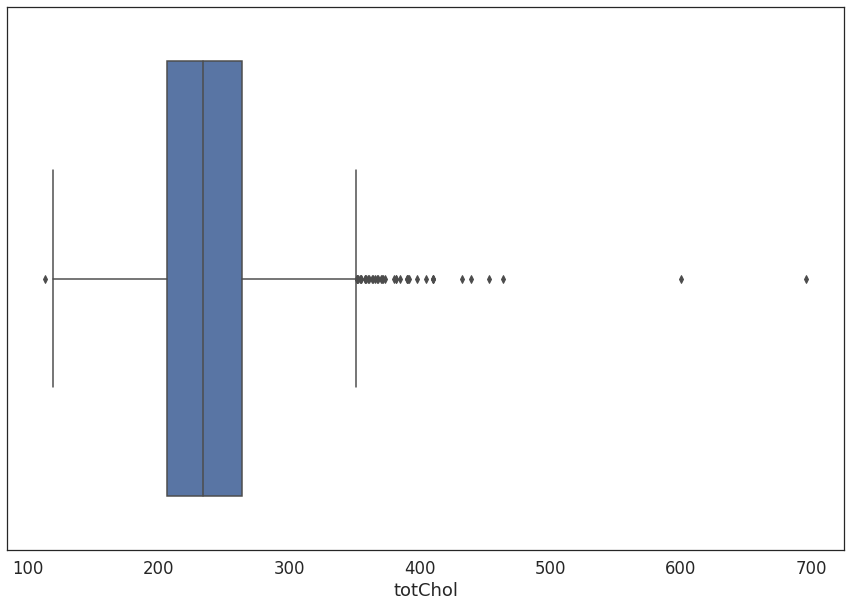

In [ ]:
sb.boxplot(newdata.totChol)
outliers =newdata[(newdata['totChol'] > 500)] 
outliers

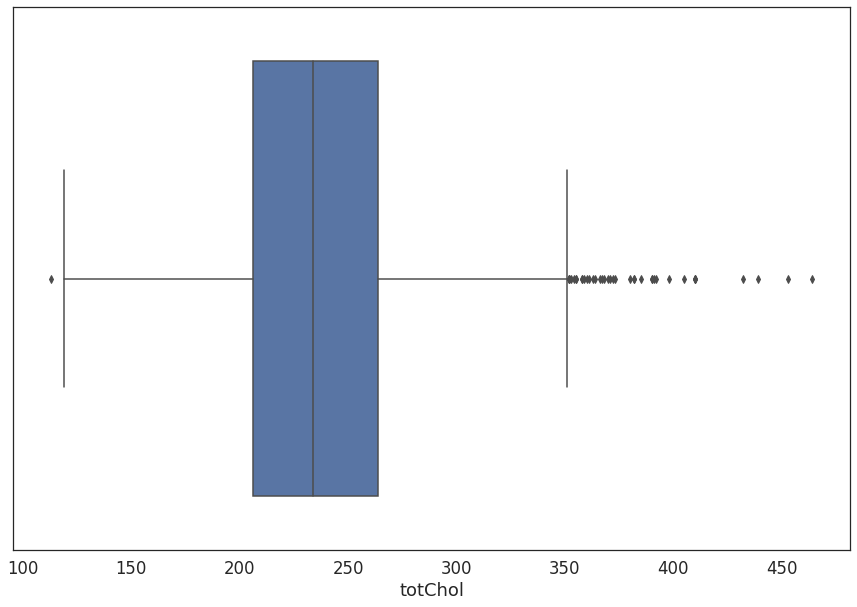

In [ ]:
newdata= newdata.drop(newdata[newdata.totChol > 599].index)
sb.boxplot(newdata.totChol)
newdata_clean=newdata

### Observations:

The outliers in totChol are detected by the Boxplot and we removed them by specifying the range

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler(feature_range=(0,1)) 
newdata_scaled = pd.DataFrame(scaler.fit_transform(newdata_clean), columns=newdata_clean.columns)

In [ ]:
newdata_scaled.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.230991,0.118260,0.462432,0.352447,0.128728,0.369677,0.311550,0.026941,0.030408,0.445185,0.152307
std,0.104228,0.067429,0.225589,0.124179,0.170391,0.126290,0.463189,0.161931,0.171730,0.497053,0.359366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158392,0.087571,0.263158,0.264957,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.210402,0.107345,0.447368,0.344729,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.283688,0.132768,0.631579,0.430199,0.285714,0.444444,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating Testing and Training Sets:

In [ ]:
y = newdata_scaled['TenYearCHD']
X = newdata_scaled.drop(['TenYearCHD'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=31)

In [ ]:
print(len(X_train))
print(len(X_test))

2249
1500


### Observations:

 - As mentioned we have used 60% of our data for training and 40% of data for testing using train_test_split
 - So 2249 rows was used for training and 1500 rows was used for testing

## MODEL SELECTION AND ACCURACY

### KNN Algorithm (k-nearest neighbour):

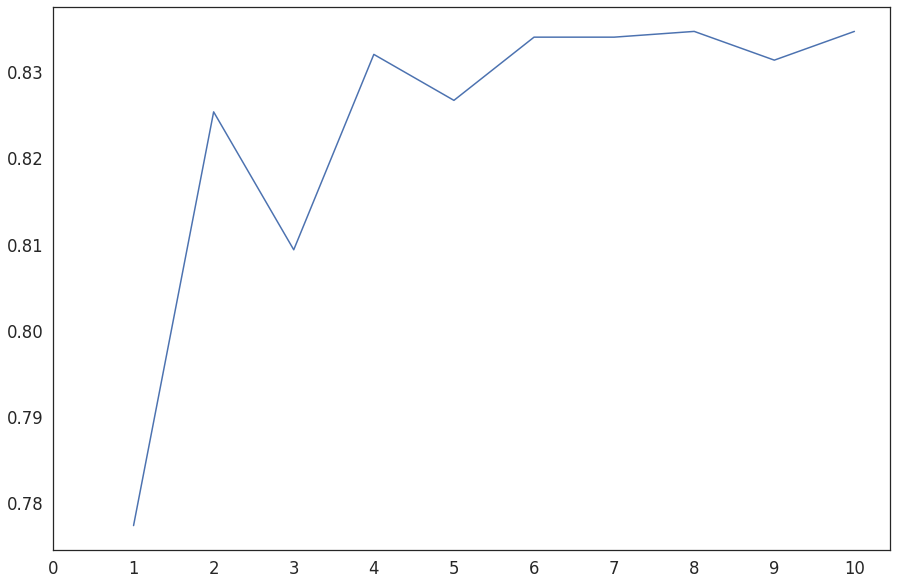

Accuracies for different values of n are: [0.77733333 0.82533333 0.80933333 0.832      0.82666667 0.834
 0.834      0.83466667 0.83133333 0.83466667]
KNearestNeighors performs best at n = 8  with a accuracy of  0.8346666666666667
[0. 0. 0. ... 0. 0. 0.]
f1 score:  0.47782144862436826


In [ ]:
#model selection
#accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
acc_index=list(range(1,11))
acc=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    acc=acc.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(acc_index, acc)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',acc.values)
final_acc = list(acc.values)
print('KNearestNeighors performs best at n =',final_acc.index(max(final_acc))+1,' with a accuracy of ',max(final_acc))
best = final_acc.index(max(final_acc))+1
model=KNeighborsClassifier(n_neighbors=best) 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(prediction)

#f1 score

y_pred = model.predict(X_test)
f1=f1_score(y_pred, y_test, average='macro')
print('f1 score: ',f1)

### Observation:

As we know it works w.r.t nearest neighbors the plot shows the accuracies for their respective neighbors
#### KNearestNeighors performs best at n = 8  with a accuracy of  0.8346666666666667

#### The KNN Algorithm accuracy (in %)=83%

#### f1 score:  0.47782144862436826

# Random Forest Classification Algorithm

In [ ]:
# Random Forest Classification
accuracies = {}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
y_pred =rf.predict(X_test)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
f1 = f1_score(y_pred, y_test, average='macro')
print('F1 score :',f1)

Random Forest Algorithm Accuracy Score : 83.67%
F1 score : 0.5220513167323656


### Observations:

Here we used Random Forest Algorithm. The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree.It handles the missing data and gives large proportion of accuracy.

#### Random Forest Algorithm performs best with a accuracy of 83.67%

#### F1 score : 0.5220513167323656

# DecisionTreeClassifier Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
f1 = f1_score(y_pred, y_test, average='macro')

acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))
print('f1 score:',f1)

Decision Tree Test Accuracy 74.60%
f1 score: 0.5614879790926062


### Observations:

We used Decision Tree Classifier algorithm here as the goal of it is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

#### Decision tree best accuracy is 73.87%

#### f1 score: 0.5727044210223163

# Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
f1=f1_score(y_pred, y_test, average='macro')

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))
print('f1 score : ',f1)

Accuracy of Naive Bayes: 82.27%
f1 score :  0.6028048547400611


### Observations:

We used Naive Bayes Algorithm here because it works on the principle of conditional probability, as given by the Bayes theorem

#### Best Accuracy of Naive Bayes: 82.27%

#### f1 score :  0.6028048547400611

# Support vector Machine Algorithm

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
f1 = f1_score(y_pred, y_test, average='macro')

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))
print("F1 score:",f1)

Test Accuracy of SVM Algorithm: 83.33%
F1 score: 0.45454545454545453


### Observations:

Support Vector Machine is one of the best algorithms which is more effective in high dimensional spaces. SVM is effective in cases where number of dimensions is greater than the number of samples

#### The Test Accuracy of SVM Algorithm: 83.33% which is the best score

#### F1 score: 0.45454545454545453

## Logistic Regression

To predict the probability of a target variable

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('framingham.csv')

In [ ]:
data.drop(['education'],axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
X=data.iloc[:,0:14]
Y=data.iloc[:,14]

In [ ]:
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [ ]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64

### Observations:

 - Here we need the original data to perform the SMOTE process
 - The columns that we have used or selected were different from the columns which we are going to select in the ifeature for the cleaned data.As It makes a difference in the accuracy of the model we took the data again and performed the reqd cleaning 

In [ ]:
#conda install -c conda-forge imbalanced-learn
#conda update scikit-learn

In [ ]:
!pip install --upgrade scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Recursive Feature Elimination

In [ ]:
col=x_data.columns
col

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfecv=RFECV(estimator=LogisticRegression(),step=1,cv=10,scoring='accuracy')
rfecv.fit(x_data,y_data.values.ravel())
print("Optimal no. of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(x_data.columns[rfecv.support_]))

### Observations:

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.


#### Optimal no. of features: 9

##### Selected features: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'sysBP']

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross Validation Score")
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [ ]:
#Using RFE, following columns have been chosen:
cols=['male','age','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','heartRate']

In [ ]:
import statsmodels.api as sm
l_model=sm.Logit(Y,X)
res=l_model.fit()
print(res.summary2())

### Logistic Regression

## Model Fitting

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
x_data=x_data[cols]
x_test=x_test[cols]

In [ ]:
lr=LogisticRegression()
lr.fit(x_data,y_data)
y_pred=lr.predict(x_test)
y_pred_proba=lr.predict_proba(x_test)[:, 1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("log_loss:",log_loss(y_test,y_pred_proba))
print("auc:",auc(fpr,tpr))
acc=accuracy_score(y_test,y_pred)*100
accuracies['Logistic Regression']=acc
f1=f1_score(y_test, y_pred, zero_division=1)
print('Log Reg f1 score is',f1)

### Observations:

#### The  Accuracy: 0.6455696202531646
#### log_loss: 0.6269486676301634
#### auc: 0.6741893883566692
#### f1 score is 0.33995037220843677

# Evaluating the Model

In [ ]:
idx=np.min(np.where(tpr>0.95))
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr,tpr))
plt.plot([0,1],[0,1],'k--')
plt.plot([0,fpr[idx]],[tpr[idx],tpr[idx]],'k--',color='blue')
plt.plot([fpr[idx],fpr[idx]],[0,tpr[idx]],'k--',color='blue')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (1-specificity)',fontsize=14)
plt.ylabel('True Positive Rate (recall)',fontsize=14)
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Observations:

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds

#### As shown in the above plot our ROC curve meets at the area of 0.674 which is the best curve area

In [ ]:
x=confusion_matrix(y_test, y_pred)

In [ ]:
x

#### OBSERVATIONS:

#### From the above confusion matrix we see that:
TP : 832

FP : 433

TN : 99

TN : 137

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['THD pos', 'THD neg']
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

### Observations:

The classification report of our model is shown above.
We got the best accuracies of precision,recall,f1 score


#### K-fold Cross Validation

In [ ]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y since cross validation takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric
accuracy_score = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, Y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, Y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print("Average accuracy:",accuracy_score.mean())
print("Average log_loss:",-scores_log_loss.mean())
print("Average auc:",scores_auc.mean())

### Observations:

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

K-fold cross-validation results:

Average accuracy: 0.8485723404255319

Average log_loss: 0.4012304408917127

#### Average auc: 0.6773954356801302

# Comparing Models

In [ ]:
colors = ["lightgreen", "gray", "lightpink", "lightblue", "yellow"]
sb.set_style("dark")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sb.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### Observations:

Comparing all the models

From the above plot we detect that all the models are giving the best accuracies of above 60%

### Random Forest : 83.67%

### Decision Tree : 75.47%

### Naive Bayes Algorithm : 82.27%

### SVM : 83.33%

### Logistic Regression : 67.3%

## F1 SCORES:

In [ ]:
data = {'Model':['Random Forest','Decision Tree','Naive Bayes','SVM','Logistic Regression'],
        'F1 Score':[0.52, 0.57, 0.60, 0.45,0.33],'Accuracies':[83.67,75.47,82.27,83.33,67.3]}

# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

#### Observations:
#### - Naive Bayes is first giving the best score of 60%

- Decision Tree has the score of 57%

- Random forest is giving the score of 52% 

- Then, SVM and LogReg are giving the scores of 45% and 33% each

## CONCLUSION:

AS the objective of our project is to predict the ten year CHD we had successfully built a model and all the scores and accuracies are upto the mark

### Scores of Naive Bayes Algorithm is Having the Highest score of 60%

However Neural networks,Advanced Feature selection Techniques and Feature Engineering Techniques can help us to increase the Prediction Power of our model